# Pocket Algorithm using Sonar dataset

#### Pocket algorithm is a modified version of Perceptron algorithm

https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/

In [26]:
import numpy as np
import pandas as pd
import random
import math
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [27]:
epoches = 50

In [28]:
df = pd.read_csv("../Data/sonar-all-data.csv")

In [29]:
df.head(1)

,1,2,3,4,5,6,7,8,9,10,...,52,53,54,55,56,57,58,59,60,output
0,0.02,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.018,0.0084,0.009,0.0032,R


#### Replacing -1 for Rock
#### Replacing 1 for Mines

In [30]:
df['output'] = df['output'].replace(['R'], -1)

In [31]:
df['output'] = df['output'].replace(['M'], 1)

In [32]:
df_train,df_test = train_test_split(df,test_size = 0.33)

In [33]:
df_train.head(2)

,1,2,3,4,5,6,7,8,9,10,...,52,53,54,55,56,57,58,59,60,output
82,0.0409,0.0421,0.0573,0.0130,0.0183,0.1019,0.1054,0.1070,0.2302,0.2259,...,0.0028,0.0036,0.0105,0.0120,0.0087,0.0061,0.0061,0.0030,0.0078,-1
126,0.0715,0.0849,0.0587,0.0218,0.0862,0.1801,0.1916,0.1896,0.2960,0.4186,...,0.0153,0.0121,0.0096,0.0196,0.0042,0.0066,0.0099,0.0083,0.0124,1


In [34]:
df_test.head(2)

,1,2,3,4,5,6,7,8,9,10,...,52,53,54,55,56,57,58,59,60,output
153,0.0233,0.0394,0.0416,0.0547,0.0993,0.1515,0.1674,0.1513,0.1723,0.2078,...,0.0104,0.0062,0.0026,0.0025,0.0061,0.0038,0.0101,0.0078,0.0006,1
86,0.0188,0.0370,0.0953,0.0824,0.0249,0.0488,0.1424,0.1972,0.1873,0.1806,...,0.0093,0.0033,0.0113,0.0030,0.0057,0.0090,0.0057,0.0068,0.0024,-1


In [35]:
x_train, y_train = df_train.drop("output",axis=1),pd.DataFrame(df_train["output"])

In [36]:
x_train.head(1)

,1,2,3,4,5,6,7,8,9,10,...,51,52,53,54,55,56,57,58,59,60
82,0.0409,0.0421,0.0573,0.013,0.0183,0.1019,0.1054,0.107,0.2302,0.2259,...,0.0113,0.0028,0.0036,0.0105,0.012,0.0087,0.0061,0.0061,0.003,0.0078


In [37]:
y_train.head(1)

,output
82,-1


In [38]:
x_test, y_test = df_test.drop("output",axis=1),pd.DataFrame(df_test["output"])

In [39]:
x_test.head(1)

,1,2,3,4,5,6,7,8,9,10,...,51,52,53,54,55,56,57,58,59,60
153,0.0233,0.0394,0.0416,0.0547,0.0993,0.1515,0.1674,0.1513,0.1723,0.2078,...,0.0071,0.0104,0.0062,0.0026,0.0025,0.0061,0.0038,0.0101,0.0078,0.0006


In [40]:
y_test.head(1)

,output
153,1


In [41]:
class Perceptron:
    def __init__(self):
        pass
    
    def fit(self,X,y, epochs = 15):
        X = X.values.tolist()
        y = y.values.tolist()
        self.weights = [random.uniform(-1,1) for x in range(len(X[0]))]
        self.X = X
        self.y = y
        self.totalErrors = []
        self.pocketErrors = []
        self.errors = []
        
        
        self.__finalizedWeights__ = {}
        te = self.__calculateError__()
        self.__finalizedWeights__[te] = self.weights
        self.pocketErrors.append(te)
        
        for i in range(epochs):
            errorCounter = 0
            for j in range(len(X)):
                temp = np.dot(X[j],self.weights)
                sign = 1 if temp > 0 else -1
                
                if sign != y[j][0]:
                    errorCounter = errorCounter + 1
                    self.weights = np.add(self.weights,np.multiply(X[j],y[j]))
                    nextError = self.__calculateError__()
                    self.__finalizedWeights__[nextError] = self.weights
                    if nextError < min(self.pocketErrors) :
                        self.pocketErrors.append(nextError)
                        pass
                    else:
                        self.pocketErrors.append(self.pocketErrors[-1])
                        pass
                    self.totalErrors.append(errorCounter)
                else:
                    pass
            self.errors.append(errorCounter)
        self.weights = self.__finalizedWeights__[min(self.__finalizedWeights__, key=int)]
        pass
    
    def __calculateError__(self):
        errorCounter = 0
        for index in range(len(self.X)):
            temp = np.dot(self.X[index],self.weights)
            sign = 1 if temp > 0 else -1
            
            if sign != self.y[index][0]:
                errorCounter = errorCounter + 1
        return errorCounter
        pass
    
    def predict(self,test):
        test = test.values.tolist()
        ans = []
        for index,value in enumerate(test):
            temp = np.dot(test[index],self.weights)
            predicted = 1 if temp > 0 else -1
            ans.append(predicted)
        return ans
        pass
    

In [42]:
model = Perceptron()

In [43]:
model.fit(x_train,y_train,epoches)

In [44]:
predictedValues = model.predict(x_test)

In [45]:
f"Accuracy is = {accuracy_score(y_test,predictedValues)*100} %"

'Accuracy is = 75.36231884057972 %'

### If you see the value of accuracy then you will notice that the accuracy is less then Perceptron Algorithm. This is because the model has overfitted the data. If we consider the accuracy on training data then pocket algorithm clearly wins but on test data perceptron alogrithm wins. So which algorithm to use is based on data.

### Link to Perceptron Algorithm https://github.com/NikhilAshodariya/Machine-Learning/blob/master/Perceptron.ipynb

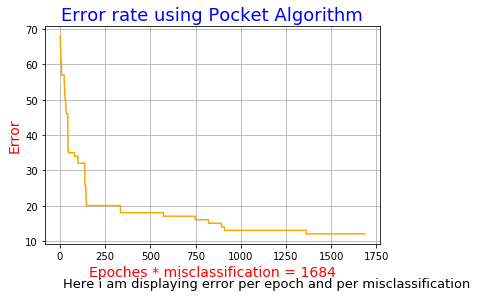

In [46]:
plt.title("Error rate using Pocket Algorithm",fontsize=18, color='Blue')
plt.xlabel(f"Epoches * misclassification = {len(model.pocketErrors)}",fontsize=14, color='red')
plt.ylabel("Error",fontsize=14, color='red')
plt.plot([i+1 for i,v in enumerate(model.pocketErrors)],model.pocketErrors,color='orange')
plt.text(15,-3,f"Here i am displaying error per epoch and per misclassification",fontsize=13)
plt.grid(True)
plt.show()

### The above graph shows the error rate of pocket algorithm per epoch the error made in each sample of the dataset. We can see that in pocket algorithm the error either remains same or decrease it never increases like perceptron. 

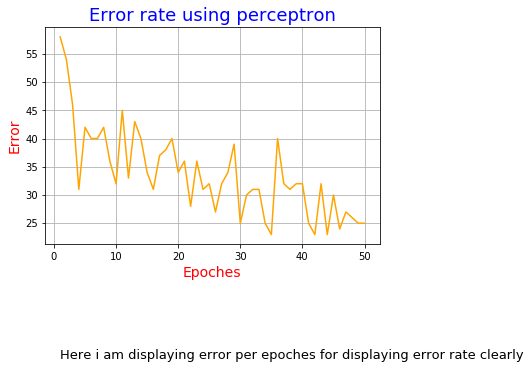

In [47]:
plt.title("Error rate using perceptron",fontsize=18, color='Blue')
plt.xlabel("Epoches",fontsize=14, color='red')
plt.ylabel("Error",fontsize=14, color='red')
plt.plot([i+1 for i,v in enumerate(model.errors)],model.errors,color='orange')
plt.grid(True)
plt.text(1,1,f"Here i am displaying error per epoches for displaying error rate clearly",fontsize=13)
plt.show()

### In the above graph I have shown the error rate per epoch instead of per sample of dataset in a epoch for better visibility

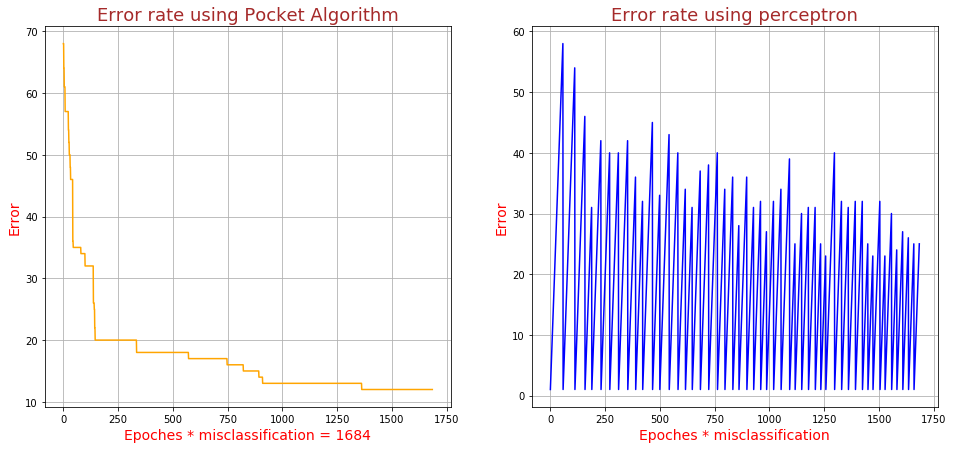

In [48]:
# Error rate using Pocket Algorithm
plt.subplot(1, 2, 1)
plt.title("Error rate using Pocket Algorithm",fontsize=18, color='Brown')
plt.xlabel(f"Epoches * misclassification = {len(model.pocketErrors)}",fontsize=14, color='red')
plt.ylabel("Error",fontsize=14, color='red')
plt.plot([i+1 for i,v in enumerate(model.pocketErrors)],model.pocketErrors,color='orange')
plt.grid(True)


# Error rate using Perceptron
plt.subplot(1,2,2)
plt.title("Error rate using perceptron",fontsize=18, color='Brown')
plt.xlabel("Epoches * misclassification",fontsize=14, color='red')
plt.ylabel("Error",fontsize=14, color='red')
plt.plot([i+1 for i,v in enumerate(model.totalErrors)],model.totalErrors,color='blue')
plt.grid(True)

fig = plt.gcf()
fig.savefig('test2png.png', dpi=100)
fig.set_size_inches(16, 7, forward=True)
plt.show()

### In the above graph i have shown error rate of both Pocket algorithm and Perceptron. The graph is ploted Error vs misclassification per epoch

In [49]:
model.weights

array([  6.49434708,   5.20666625,  -1.0651578 ,   5.9285464 ,
         0.38954011,   2.19785949,  -7.19020066,  -6.36865816,
         5.78991167,   8.13764088,  16.1957159 ,  14.11348622,
         0.7135062 , -12.15649914,  -1.23789117,  -3.37846315,
         3.02069328,   0.30967706,  -2.29244098,  -2.34473584,
        -4.80098474,   4.21370868,   8.17439399,  -3.07714986,
         6.98463506, -15.62930118,  -4.11071716,  17.25289321,
        -4.35666154,   7.14945399, -21.92682624,   1.02425773,
        -7.40977794,   4.1883253 ,   0.92339411,  -6.95238857,
        -5.42052931,  -3.34821672,  13.50343971, -11.11338629,
        -1.38566594,  10.58811697,   6.58576134,   2.3218391 ,
         9.52022845,  -1.97521303,   5.18012798,  13.37682766,
         6.80688221,  -1.50866033,   1.54594814,   2.00758829,
        -0.89920522,   0.96244731,  -0.58831477,   1.12025941,
        -0.44114813,   0.7158981 ,   1.4962691 ,   1.11292752])

In [50]:
np.asarray(model.pocketErrors)

array([68, 68, 64, ..., 12, 12, 12])